In [215]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf


In [216]:
from sklearn.datasets import load_boston
boston = load_boston()

In [217]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [218]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [219]:
#print (boston.DESCR) #decription of Boston dataset

In [220]:
# create a data frame
bos = pd.DataFrame(boston.data)
bos.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [221]:
#replace coulumn name feature names
bos.columns= boston.feature_names
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [222]:
#boston.target[:] # return all target values
boston.target[:5] # getting forst 5 values

array([24. , 21.6, 34.7, 33.4, 36.2])

In [223]:
bos['PRICE'] = boston.target
bos.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


Apply linear regression model and predict the Boston housing prices. I will use the least squares method as the way to estimate the coefficients.

Y = boston housing price (target variable)
X = all other features (independent variable)

In [224]:
# from STATSModels##
lm1 = smf.ols(formula = 'PRICE ~ RM', data=bos).fit()
print(lm1.params)

print ()
lm2 = smf.ols(formula = 'PRICE ~ PTRATIO', data=bos).fit()
print(lm2.params)

Intercept   -34.670621
RM            9.102109
dtype: float64

Intercept    62.344627
PTRATIO      -2.157175
dtype: float64


In [225]:
from sklearn.linear_model import LinearRegression
X= bos.drop('PRICE', axis =1) 

feature_col =['RM'] # calculate on one variable
X1 = bos[feature_col]
Y = bos.PRICE

lm = LinearRegression()
lm.fit(X1,Y)
print(lm.intercept_)
print(lm.coef_) 

## conclusion ##
#### A unit increase in RM (room) , property price will increase by 9.10
## adding one more room means area increased and price will go up

## Model Prediction # y = c + mx
## y = - 34.67 + 9.10 * 4

-34.67062077643857
[9.10210898]


In [226]:
# StatModel
X_new =pd.DataFrame({'RM':[5]})
lm1.predict(X_new)


0    10.839924
dtype: float64

In [227]:
#stats model
# print confidence interval for the model coefficients
lm1.conf_int()

,0,1
Intercept,-39.876641,-29.464601
RM,8.278855,9.925363


In [228]:
#stats model print p values
lm1.pvalues

Intercept    6.950229e-34
RM           2.487229e-74
dtype: float64

In [229]:
lm1.rsquared

0.483525455991334

In [230]:
lm1.summary() # using one variable RM

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           2.49e-74
Time:                        12:45:26   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
lm.predict(5) #room count increased to 5

array([10.83992413])

In [232]:
lm.score(X1,Y)

0.4835254559913343

## Multiple Linear variable

In [233]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [234]:
# StatModel #
# lm4 = smf.ols(formula = 'PRICE ~ CRIM+ ZN + INDUS + CHAS+ NOX + RM + AGE+ DIS+ RAD + TAX + PTRATIO+ B+ LSTAT', data=bos).fit()
# after eliminate INDUS and AGE

lm4 = smf.ols(formula = 'PRICE ~ CRIM+ ZN + CHAS+ NOX + RM + DIS+ RAD + TAX + PTRATIO+ B+ LSTAT', data=bos).fit()
print(lm4.params)

Intercept    36.369366
CRIM         -0.107558
ZN            0.045804
CHAS          2.721207
NOX         -17.395642
RM            3.796650
DIS          -1.493360
RAD           0.299090
TAX          -0.011764
PTRATIO      -0.947112
B             0.009372
LSTAT        -0.523172
dtype: float64


In [235]:
from sklearn.linear_model import LinearRegression
X= bos.drop('PRICE', axis =1) 

Y = bos.PRICE

lm5 = LinearRegression()
lm5.fit(X,Y)
print(lm5.intercept_)
print(lm5.coef_) 

## conclusion ##
#### A unit increase in RM (room) , property price will increase by 9.10
## adding one more room means area increased and price will go up

## Model Prediction # y = c + mx
## y = - 34.67 + 9.10 * 4

36.491103280363404
[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [236]:
list(zip(X,lm5.coef_))

[('CRIM', -0.10717055656035501),
 ('ZN', 0.04639521952980191),
 ('INDUS', 0.0208602395321751),
 ('CHAS', 2.688561399317955),
 ('NOX', -17.79575866030916),
 ('RM', 3.8047524602580123),
 ('AGE', 0.0007510617033263944),
 ('DIS', -1.4757587965198167),
 ('RAD', 0.3056550383391),
 ('TAX', -0.01232934630527538),
 ('PTRATIO', -0.9534635546905618),
 ('B', 0.009392512722188329),
 ('LSTAT', -0.5254666329007911)]

In [237]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 26 Feb 2018   Prob (F-statistic):          5.74e-137
Time:                        12:45:42   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3694      5.069      7.176      0.000      26.411      46.328
CRIM          -0.1076      0.033     -3.296      0.001      -0.172      -0.043
ZN             0.0458      0.014      3.387      0.001       0.019       0.072
CHAS           2.7212      0.854      3.185      0.002       1.043       4.400
NOX          -17.3956      3.536     -4.920      0.000     -24.343     -10.448
RM             3.7966      0.406      9.343      0.000       2.998       4.595
DIS           -1.4934      0.186     -8.039      0.000      -1.858      -1.128
RAD            0.2991      0.063      4.719      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.488      0.001      -0.018      -0.005
PTRATIO       -0.9471      0.129     -7.337      0.000      -1.201      -0.693
B              0.0094      0.003      3.508      0.000       0.004       0.015
LSTAT         -0.5232      0.047    -11.037      0.000      -0.616      -0.430
==============================================================================
Omnibus:                      178.444   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.944
Skew:                           1.524   Prob(JB):                    1.31e-171
Kurtosis:                       8.295   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
# INDUS and AGE variable ahave higher p value we can eleminate these 2 variable

RM,DIS,PTRatio,LSTAT etc have small p-values 95% = .05 whereas INDUS and AGE have a large p-value
Reject the null hypothesis for RM,DIS,PTRatio,LSTAT
There is association between features and PRICe

    Fail to reject the null hypothesis for INDUS and AGE
    There is no association


This model has a higher R-squared (0.741) than the previous model (0.484)
This model provides a better fit to the data than a model that only includes RM or pTRatio

In [239]:
#print ('Estimated intercept coefficient:' , lm.intercept_)
#pd.DataFrame(zip(X.columns,lm.coef_),column=['features','Coefficients'])

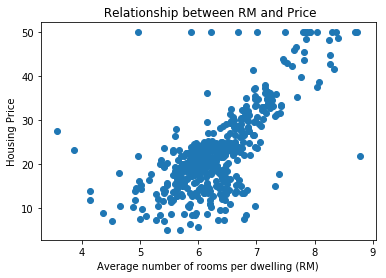

In [240]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title(" Relationship between RM and Price")
plt.show()

In [241]:
lm.fit(X[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, 
you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and 
square the value. Then you add up all those values for all data points, and, in the case of a linear fit, divide by 
the number of points minus two.** The squaring is done so negative values do not cancel positive values. 
The smaller the Mean Squared Error, the closer the fit is to the data. The MSE has the units squared of whatever 
is plotted on the vertical axis.

In [242]:
mse = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) **2)
print (mse)

62.65220001376927


msefull = np.mean((bos.PRICE - lm.predict(X)) **2)
print (msefull)

In [244]:
########## 

# All variableApply traing Test Split and Check the Root mean square error

X= bos.drop('PRICE', axis =1) 
Y = bos.PRICE
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X,bos.PRICE,test_size =.02,random_state=5)

lm6 = LinearRegression()

lm6.fit(X_train,Y_train)
y_pred = lm6.predict(X_Test)

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


5.053162776831717


In [245]:
# Excluding INDUS and Age
X= bos.drop(['PRICE','INDUS','AGE'], axis =1) 
Y = bos.PRICE
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X,bos.PRICE,test_size =.02,random_state=5)
lm7 = LinearRegression()

lm7.fit(X_train,Y_train)
y_pred = lm7.predict(X_test)

#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

#### after removing INDUS and Age error is reduce.

3.7828398062751316


lm =LinearRegression()
lm.fit(X_train,Y_train)
pred_train =lm.predict(X_train)
pred_test =lm.predict(X_test)

Text(0,0.5,'Residuals')

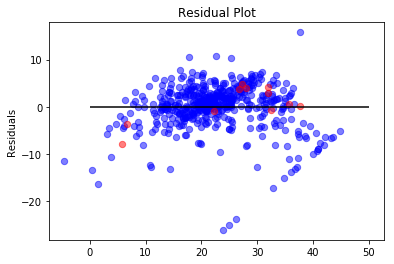

In [246]:
plt.scatter(lm7.predict(X_train),lm7.predict(X_train) - Y_train, c='b',s=40,alpha=0.5)
plt.scatter(lm7.predict(X_test),lm7.predict(X_test) - Y_test, c='r',s=40,alpha=0.5)
plt.hlines(y =0, xmin =0,xmax=50)
plt.title ('Residual Plot')
plt.ylabel ('Residuals')